# 모델 훈련

그 전까지는 머신러닝 모델과 훈련 알고리즘을 블랙박스 취급.

실제 어떻게 구현되는지는 몰라도 구현했지만 지금부터는 구현의 상세 사항을 실제로 알아야 함.

|

작동원리를 이해하고 있다면 디버깅이나 에러를 효율적으로 분석하는데 도움이 될 것.

이번 장에서 언급하는 대부분의 주제는 2부에서 다룰 신경망을 이해하고 구축하고 훈련시키는데 필수.

|

이번 장은 선형 회귀부터 시작함. 이 모델은 훈련시키는 2가지 방법을 설명하자면

* 직접 계산 가능한 공식을 사용해 훈련 세트에 가장 적합한 모델 파라미터(훈련세트에 대해

  비용함수를 최소화하는 모델 파라미터)를 해석적으로 구함

* 경사하강법(gradient Descent)라고 불리는 반복적 최적화 방식을 사용해 모델 파라미터를

  조금씩 바꾸면서 비용함수를 훈련 세트에 대해 최소화 시킴. 결국은 앞에 방법과 동일한 파라미터로 수렴.

-> 배치 경사하강법, 미니배치 경사하강법, 확률적 경사하강법도 살펴봄.

### ! CAUTION

이 장에는 기초적인 선형대수와 미분 기호를 사용한 수학 방정식이 꽤 나옴.

이 식들을 이해하려면 행렬, 전치, 점곱, 역행렬, 편미분에 대해 알아야 함.

잘모르겠다면 깃허브에서 잘 살펴볼 것.

# 선형회귀

다음은 1장에서 본 삶의 만족도에 대한 간단한 선형회귀모델임.

ex.) 삶의 만족도 $= \theta_0 + \theta_1 * $ 1인당_GDP

**Equation 4-1: Linear Regression model prediction**

$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n
$


**Equation 4-2: Linear Regression model prediction (vectorized form)**

$
\hat{y} = h_{\boldsymbol{\theta}}(\mathbf{x}) = \boldsymbol{\theta} \cdot \mathbf{x}
$

이것이 선형 회귀 모델. 그러면 이제 훈련시켜볼까요? 모델을 훈련시킨다는 것은

모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것.

 

2장에서 회귀에 가장 널리 사용되는 지표는 RMSE(평균제곱근오차)라고 언급했었고,

그러므로 선형 회귀 모델을 훈련시키려면 RMSE를 최소화하는 $\theta$ 를 찾아야 함.

 

훈련 세트 X에 대한 선형 회귀 가설 $h_{\boldsymbol{\theta}}$ 의 MSE는 위의 식처럼 계산함.

**Equation 4-3: MSE cost function for a Linear Regression model**

$
\text{MSE}(\mathbf{X}, h_{\boldsymbol{\theta}}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{(\boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)})^2}
$

이 표기의 대부분은 2장에서 설명했고 딱 하나의 차이는 벡터 $\theta$ 를 가진다는 것임.

간단하게 표시하기 위해 $\text{MSE}(\mathbf{X}, h_{\boldsymbol{\theta}})$ 대신

$\text{MSE}(\theta)$ 라고 쓰겠습니다.


## 정규방정식

**Equation 4-4: Normal Equation**

$
\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$

In [1]:
import os

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)        # (0~1)난수생성 100 * 1
y = 4 + 3 * X + np.random.randn(100, 1) # 난수생성 100 * 1

그림 저장: generated_data_plot


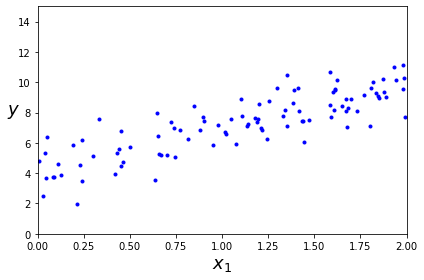

In [3]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

그럼 이제 정규방정식을 사용해 $\hat{\theta}$ 를 계산해봅시다.

넘파이 선형대수 모듈 (np.linalg) 에 있는 inv()를 사용해 역행렬을 계산하고 

dot()을 사용해 행렬곱셈을 하겠습니다.

#### random 함수 ***

* np.random.seed seed를 통한 난수 생성

* np.random.randint 균일 분포의 정수 난수 1개 생성

* np.random.rand 0부터 1사이의 균일 분포에서 난수 matrix array생성

* np.random.randn 가우시안 표준 정규 분포에서 난수 matrix array생성

* np.random.shuffle 기존의 데이터의 순서 바꾸기

* np.random.choice 기존의 데이터에서 sampling

* np.unique 데이터에서 중복된 값을 제거하고 중복되지 않는 값의 리스트를 출력

* np.bincount 발생하지 않은 사건에 대해서도 카운트를 해준다

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

이 데이터를 생성하기 위해 사용한 함수는 $\text{y} = 4 + 3 x_1 + $ 가우시안_잡음

정규방정식으로 계산한 값을 확인해봅시다.

In [5]:
theta_best

array([[4.15103523],
       [2.84510043]])

$\theta_0 = 3.83$ 과 $\theta_1 = 3.07$ 대신 $\theta_0 = 4$ 와 $\theta_1 = 3$ 을 기대했으나 약간의 오차

매우 비슷하지만 잡음 때문에 원래 함수의 파라미터를 정확하게 재현하지 못함.

$\hat{\theta}$ 를 사용해 예측해봅시다.

In [6]:
X_new = np.array([[0], [2]])            # 2차원 행렬
X_new_b = np.c_[np.ones((2, 1)), X_new] # X_new 행렬과 2*1 행렬을 왼쪽에서 오른쪽으로 합침
                                        # c_ 왼쪽에서 오른쪽으로 합치기
                                        # r_위에서 아래로 합치기
                                        # ones, zeros, empty 각각 제목의 원소를 가진 행렬 생성
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.15103523],
       [9.84123608]])

모델 예측을 위해 그래프를 그려봅시다.

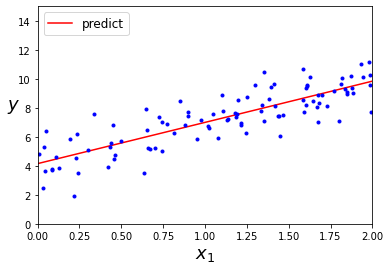

In [7]:
plt.plot(X_new, y_predict, "r-", label="predict")   # 선의 이름은 여기서 설정
plt.legend(loc="upper left", fontsize=12)   # 범례 위치
plt.xlabel("$x_1$", fontsize=18)            # x축 이름
plt.ylabel("$y$", rotation=0, fontsize=18)              # y축 이름
plt.plot(X, y, "b.")          # 파란색 포인트 마커
plt.axis([0, 2, 0, 15])       # x범위 (0 ~ 2.00), y범위 (0 ~ 15.00)

plt.show()

사이킷런에서 선형 회귀를 수행하는 것은 간단.

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.15103523]), array([[2.84510043]]))

LinearRegression 클래스는 scipy.linalg.lstsq()를 기반으로 함. 직접 호출도 가능

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.15103523],
       [2.84510043]])

이 함수는 $\mathbf{X}^+\mathbf{y}$을 계산합니다. $\mathbf{X}^{+}$는 

$\mathbf{X}$의 _유사역행렬_ (pseudoinverse)입니다(Moore–Penrose 유사역행렬입니다). 

`np.linalg.pinv()`을 사용해서 유사역행렬을 직접 계산할 수 있습니다:

In [10]:
np.linalg.pinv(X_b).dot(y)

array([[4.15103523],
       [2.84510043]])

유사역행렬 자체는 특잇값분해(Singular Value Decomposition)라 부르는 표준 행렬 분해 기법을

사용해 계산되고, SVD는 훈련세트행렬 X를 3개의 행렬곱셈 $\mathbf{U} \mathbf{\sum\limits} \mathbf{V}^T$

로 분해 (numpy.linalg.svd() 참고) 유사역행렬은 $\text{X}^+ = \text{V} \mathbf{\sum\limits}^+ \mathbf{U}^T $ 로 계산됨

알고리즘이 먼저 $\mathbf{\sum\limits}$ 를 먼저 구하고 그다음 어떤 낮은 임곗값보다 

작은 모든 수를 0으로 바꿈. 그 다음 0이 아닌 모든 값은 역수로 치환함.

|

마지막으로 만들어진 행렬을 전치함. 정규방정식을 계산하는 것보다 이 방식이 효율적

또한 극단적인 경우도 처리할 수 있음. 실제로 m < n 이거나 어떤 특성이 중복되어 

행렬 $\mathbf{X}^T \mathbf{X}$ 의 역행렬이 없다면 정규방정식이 작동 안 함. 하지만 유사역행렬은 항상 구할 수 있음.

## 계산복잡도

정규방정식은 $(\mathbf{n}+1)*(\mathbf{n}+1)$ 크기가 되는  $\mathbf{X}^T \mathbf{X}$ 의 역행렬을 계산

(n은 특성 수) 역행렬 계산하는 계산 복잡도는 일반적으로 $\mathbf{O}(\mathbf{n^{2.4}})$ ~ $\mathbf{O}(\mathbf{n^{3}})$ 사이

다시 말해 특성 수가 2배로 늘어나면 계산 시간이 대략 5.3배에서 8배 증가

 

사이킷런의 LinearRegression 클래스가 사용하는 SVD 방법은 약 $\mathbf{O}(\mathbf{n^{2}})$ 임.

특성 수 2배 -> 계산시간 4배

### ! CAUTION

정규방정식과 SVD방법 모두 특성 수가 많아지면 (대략 100,000) 매우 느려짐.

다행인 것은 훈련세트의 샘플 수에 대해서는 선형적으로 증가함.(둘 다 $\mathbf{O}(\mathbf{m})$)

따라서 메모리 공간만 허락된다면 큰 훈련 세트도 효율적으로 처리가능.

또한 학습된 선형모델은 예측이 매우 빠름. 예측 계산복잡도는 샘플 수와 특성 수에 선형적임.

다시 말해 예측하려는 샘플이 2배로 늘어나면 걸리는 시간도 2배

# 경사하강법 (GD)

이제는 아주 다른 방법으로 선형회귀모델을 훈련 실습을 해보도록함.

이 방법은 특성이 매우 많고 훈련 샘플이 너무 많아 메모리에 모두 담을 수 없을 때 적합.

|

파라미터 벡터 $\theta$ 에 대해 비용함수의 현재 그레디언트를 계산.

그리고 그레디언트가 감소하는 방향으로 진행. 그레디언트가 0이면 최솟값에 도달.

구체적으로 보면 $\theta$ 값을 무작위 초기화함. 그리고 조금씩 비용함수가 감소되는 방향으로 진행해

알고리즘이 최솟값에 수렴할 때까지 점진적으로 수행.

|

GD의 중요한 파라미터는 학습률(Learning rate)로 결정됨. 

학습률이 작으면 반복을 많이 해야하므로 시간이 오래걸림.

반대로 학습률이 너무 크면 골짜기를 가로질러 반대편으로 건너뛰게 되서 더 큰 값으로 발산됨.

|

그렇다고 모든 비용함수가 매끈한 그릇같지는 않기 때문에 패인곳이나 산마루, 평지과 같은

특이한 지형이 있으면 최솟값으로 수렴하기 어려움. 전역최솟값과 지역최솟값 때문에 문제가 될 수 있음.

|

다행히 선형 회귀를 위한 MSE 비용함수는 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 

가로지르지 않는 볼록함수임. -> 지역최솟값이 없고 전역최솟값만 존재

또한 연속함수이며 기울기가 갑자기 변하지도 않음.

=> 이 두 사실로부터 경사하강법(Gradient Descent)이 전역 최솟값에 가깝게 접근 가능함을 보장.

|

사실 비용 함수는 그릇모양을 하고 있지만 특성들의 스케일이 매우 다르면 길쭉한 모양일 수 있음.

### ! CAUTION

경사하강법을 사용할 때는 반드시 모든 특성이 같은 스케일을 갖도록 만들어야 함.

그렇지 않으면 수렴하는데 오래 걸림. (사이킷런의 도구 StandardScalar)

## 배치 경사 하강법

경사 하강법을 구현하려면 각 모델 파라미터 $\theta_\mathbf{j}$ 에 대해 비용함수의 그레디언트를 계산함.

다시 말해 $\theta_\mathbf{j}$ 가 조금 변경될 때 비용함수가 얼마나 바뀌는지 계산해야함.

이를 편도함수라고함. 이는 '동쪽을 바라봤을 때 발밑에 느껴지는 산의 기울기는 얼마인가?'와 같은 질문임.

|

그리고 같은 질문을 북쪽에 대해서도 함.

[식 4-5]는 파라미터 $\theta_\mathbf{j}$ 에 대한 비용함수의 편도함수 $\dfrac{\partial}{\partial \theta_j} \text{MSE}(\boldsymbol{\theta})$ 임

|

**Equation 4-5: Partial derivatives of the cost function**

$
\dfrac{\partial}{\partial \theta_j} \text{MSE}(\boldsymbol{\theta}) = \dfrac{2}{m}\sum\limits_{i=1}^{m}(\boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)})\, x_j^{(i)}
$


**Equation 4-6: Gradient vector of the cost function**

$
\nabla_{\boldsymbol{\theta}}\, \text{MSE}(\boldsymbol{\theta}) =
$
$\begin{pmatrix}
 \frac{\partial}{\partial \theta_0} \text{MSE}(\boldsymbol{\theta}) \\
 \frac{\partial}{\partial \theta_1} \text{MSE}(\boldsymbol{\theta}) \\
 \vdots \\
 \frac{\partial}{\partial \theta_n} \text{MSE}(\boldsymbol{\theta})
\end{pmatrix}
 = \dfrac{2}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$


### ! CAUTION 

이 공식은 매 경사하강법 스텝에서 전체 훈련 세트 X에 대해 계산합니다.

그래서 이 알고리즘을 '배치경사하강법'이라고 함. 즉 매 스텝에서 훈련데이터 전체를 사용. 

(사실 전체경사하강법이 더 어울림)

|

그러나 경사하강법은 특성 수에 민감하지 않음. 이런 이유로 매우 큰 훈련세트에서는 아주 느림.

경사하강법은 특성 수에 민감하지 않음. 수십만 개의 특성에서 선형회귀를 훈련시키려면 

정규방정식이나 SVD분해보다 경사하강법을 사용하는 편이 훨씬 빠름.

**Equation 4-7: Gradient Descent step**

$
\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta} - \eta \nabla_{\boldsymbol{\theta}}\, \text{MSE}(\boldsymbol{\theta})
$


$ O(\frac{1}{\text{iterations}}) $


$ \hat{y} = 0.56 x_1^2 + 0.93 x_1 + 1.78 $


$ y = 0.5 x_1^2 + 1.0 x_1 + 2.0 + \text{Gaussian noise} $


$ \dfrac{(n+d)!}{d!\,n!} $


$ \alpha \sum_{i=1}^{n}{{\theta_i}^2}$

|

위로 향하는 그레디언트 벡터가 구해지면 반대 방향인 아래로 가야함.

$\theta$ 에서 $\nabla_{\boldsymbol{\theta}}\, \text{MSE}(\boldsymbol{\theta})$ 를 빼야한다는 뜻. 여기서 학습률
$\eta$ 가 사용됨. 

내려가는 스텝의 크기를 결정하기 위해 그레디언트 벡터에 $\eta$ 를 곱함.

In [11]:
eta = 0.1               # 학습률
n_iterations = 1000     # 반복 횟수
m = 100

theta = np.random.randn(2,1)  # 랜덤 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)     # T는 전치행렬
    theta = theta - eta * gradients

In [12]:
# theta 확인
theta

array([[4.15103523],
       [2.84510043]])

정규방정식으로 찾은 것과 정확히 같음. 학습률 $\eta$ 를 바꿔보면 어떨까?

아래 그림은 3가지 다른 학습률을 사용해 진행한 경사하강법의 스텝 처음 10개를 보여줌.

In [13]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

그림 저장: gradient_descent_plot


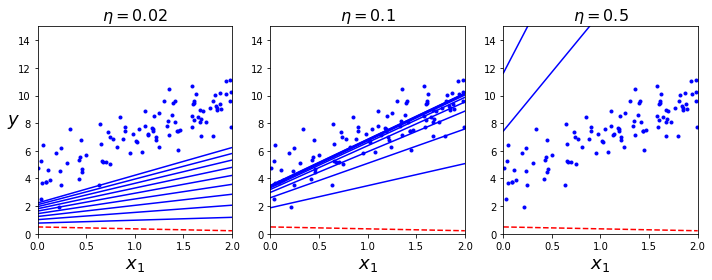

In [14]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

왼쪽은 학습률이 너무 낮아 최적점에 결국 도달하겠지만 시간이 오래 걸리 것임.

가운데는 학습률이 적당해보임. 반복 몇 번만에 최적점에 수렴.

오른쪽은 학습륭이 너무 높아 발산, 최적점에서 점점 멀어짐.

|

적절한 학습률을 찾으려면 그리드 탐색(2장 참고)을 사용.

하지만 그리드 탐색에서 수렴하는데 너무 오래걸리는 모델을 막기 위해 반복횟수 제한필요.

|

반복 횟수를 아주 크게 지정하고 그레디언트 벡터가 아주 작아지면, 즉 벡터의 노름이 어떤 값보다

작아지면 경사하강법이 거의 최솟값에 도달한 것이므로 알고리즘을 중지하는 것.


## 확률적 경사 하강법


확률적경사하강법은 매 스텝에서 1개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레디언트를 계산. 

매 반복에서 다뤄야 할 데이터가 매우 적기 때문에 한번에 하나의 샘플을 처리하면 알고리즘이 

확실히 훨씬 빠름. 또한 매 반복에서 하나의 샘플만 메모리에 있으면 되므로 

매우 큰 훈련 세트도 훈련시킬 수 있음.

In [15]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

그림 저장: sgd_plot


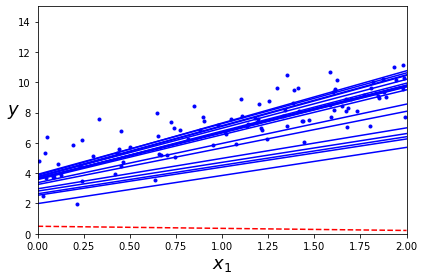

In [16]:
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 랜덤 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # 책에는 없음 | i는 20미만이고 에포크는 0일 때
            y_predict = X_new_b.dot(theta)           # 책에는 없음 | 스칼라 내적 (그냥 행렬 곱)
            style = "b-" if i > 0 else "r--"         # 책에는 없음 | i가 0 이상일때 파란 실선
                                                     # 그 외는 붉은 점선
            plt.plot(X_new, y_predict, style)        # 책에는 없음 | 반복으로 스타일 지정
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # 책에는 없음

plt.plot(X, y, "b.")                                 # 파란색 점 출력
plt.xlabel("$x_1$", fontsize=18)                     # x축 이름
plt.ylabel("$y$", rotation=0, fontsize=18)           # y축 이름
plt.axis([0, 2, 0, 15])                              # x축 범위 (0~2), y축 범위(0~15)
save_fig("sgd_plot")                                 # 그림 저장 함수
plt.show()                                           # 그래프 구현

In [17]:
theta

array([[4.11362256],
       [2.79957649]])

배치경사하강법에서는 전체훈련세트에 대해 1000번 반복하는 동안 이 코드는 훈련세트에서 50번만 반복하고도

매우 좋은 값에 도달. 위의 그림은 훈련스텝의 첫 20개를 보여줌.(스텝이 불규칙하게 진행)

|

샘플을 무작위로 선택하기 때문에 어떤 샘플은 한 에포크에서 여러 번 선택될 수도 있고

어떤 샘플은 전혀 선택되지 못할 수도 있음. 알고리즘이 에포크마다 모든 샘플을 사용하게 하려면 훈련세트를 섞은 후

(입력 특성과 레이블을 동일하게 섞어야 함.) 차례대로 하나씩 선택하고 다음 에포크에서 다시 섞는 식의 방법을 사용

### ! CAUTION 

확률적 경사 하강법을 사용할 때 훈련 샘플이 IID를 만족해야 평균적으로 파라미터가 전역 최적점을

향해 진행한다고 보장할 수 있음. 이렇게 만드는 간단한 방법은 훈련하는 동안 샘플을 섞는 것.

(각 샘플을 랜덤하게 선택하거나 에포크를 시작할 때 훈련 세트를 섞음.)

|

만약 레이블 순서대로 정렬된 샘플처럼 샘플을 섞지 않은 채로 사용하면 

확률적 경사하강법이 먼저 한 레이블에 최적화하고 그다음 레이블을 최적화하는 식으로 진행됨.

결국 이 모델은 최적점에 도달 못할 것임.

사이킷런 SGD방식으로 선형회귀를 사용하려면 기본값으로 제곱오차비용함수를 최적화하는

SGDRegressor 클래스를 사용함. 다음코드는 최대 1000번 에포크 동안 실행됨.(max_iter=1000)

또는 한 에포크에서 0.001보다 적게 손실이 줄어들 때까지 실행됨.(tol=1e-3)

학습률 0.1 (eta0=0.1)로 학습 스케줄(이전과는 다른)을 사용함.

|

규제는 전혀 사용하지 않았음. (penalty=None, 곧 다룸)

In [18]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [19]:
sgd_reg.intercept_, sgd_reg.coef_ # intercept_ = 절편, coef_ = 기울기

(array([4.14531586]), array([2.87544905]))

여기서도 정규방정식과 비슷한 값을 얻음.

## 미니배치 경사하강법

각 스텝에서 전체훈련세트나 하나의 샘플을 기반으로 그레디언트를 계산하는 것이 아닌 미니배치라

부르는 임의의 작은 샘플세트에 대해 그레디언트를 계산함.

In [20]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

그림 저장: gradient_descent_paths_plot


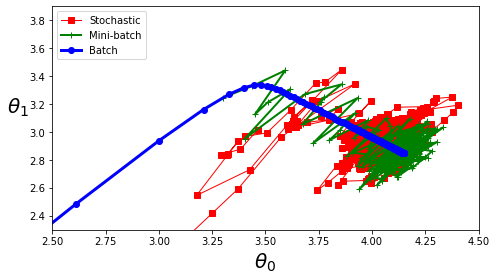

In [21]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=10)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

특히 미니배치를 어느정도 크게 하면 이 알고리즘은 파라미터 공간에서 SGD보다 덜 불규칙하게

움직임. 결국 미니배치 경사하강법 SGD보다 최솟값에 더 가까이 도달하게 될 것.

|

하지만 지역 최솟값에서 빠져나오는 것이 어려울지도 모름.

위 그림은 3가지 경사하강법 알고리즘이 훈련과정동안 파라미터 공간에서 움직인 경로

모두 최솟값 근처에 도달했지만 배치경사하강법의 경로가 실제로 최솟값에 멈춘반면

확률적, 미니배치 경사하강법은 근처에서 맴돎.

|

하지만 배치경사하강법은 스텝에 너무 많은 시간 소요됨.

확률적, 미니배치 경사하강법도 적절한 학습 스케줄을 사용하면 최솟값에 도달가능함.

## 다항 회귀

각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형모델을

훈련시키는 것. 먼저 간단한 2차방정식으로 비선형 데이터 생성

In [22]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

그림 저장: quadratic_data_plot


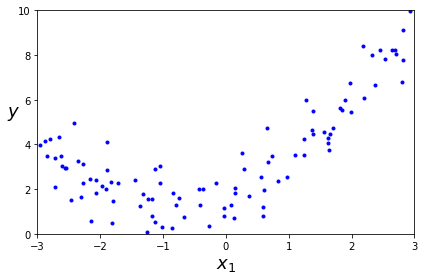

In [23]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

사이킷런의 PolynomialFeatures를 사용해 훈련데이터를 변환해보겠습니다.

훈련세트에 있는 각 특성을 제곱하여 새로운 특성으로 추가합니다.(여기서는 특성 하나 추가됨.)

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

X_poly는 이제 원래 특성X와 이 특서으이 제곱을 포함함. 이 확장된 훈련데이터에 LinearRegression을 적용해봄.

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

reshape(n, m) : 행렬 재구성 -> n개의 행(가로), m개의 열(세로)

linspace(a, b, c) : a ~ b 까지의 범위의 c개의 1차원 배열을 만듦

그림 저장: quadratic_predictions_plot


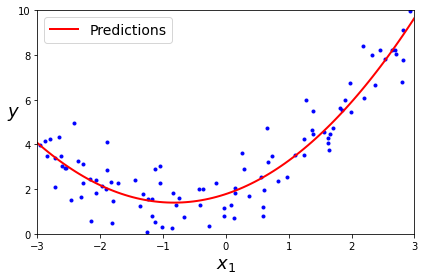

In [26]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

## 학습 곡선

고차 다항 회귀를 적용하면 보통의 선형회귀에서보다 훨씬 더 훈련데이터에 잘 맞추려 할 것.

예를 들어 밑의 그래프는 300차 다항 회귀 모델을 이전의 훈련 데이터에 적용한 것.

그림 저장: high_degree_polynomials_plot


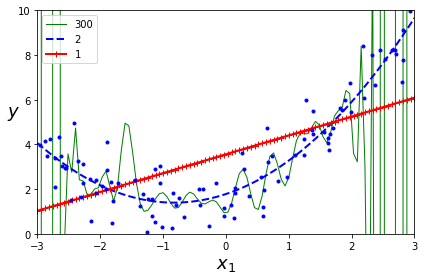

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

이 고차 다항모델은 심각하게 훈련데이터가 과대적합됨. 반면 선형모델은 과소적합됨.

이 경우 가장 일반화가 잘된 모델은 2차 다항회귀. 2차방정식으로 생성한 데이터이기 때문에 당연한 결과지만

일반적으로 어떤 함수가 데이터로 생성됬는지 알 수 없음.

|

2장에서 성능 측정하기 위해 교차 검증을 사용. 

훈련데이터에서 성능이 좋으나 교차검증점수가 낮다면 과대적합. 둘 다 낮다면 과소적합.

이 때 모델이 너무 복잡하다고 말함. 

|

또 다른 방법으로 학습 곡선이 있음. 이 그래프는 훈련세트와 검증세트의 모델 성능을 훈련 세트크기의 함수로

나타냄. 이 그래프를 생성하기 위해선 단순히 훈련세트에서 크기가 다른 서브세트를 만들어 여러번 훈련하면 됨.

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # 책에는 없음
    plt.xlabel("Training set size", fontsize=14) # 책에는 없음
    plt.ylabel("RMSE", fontsize=14)              # 책에는 없음

그림 저장: underfitting_learning_curves_plot


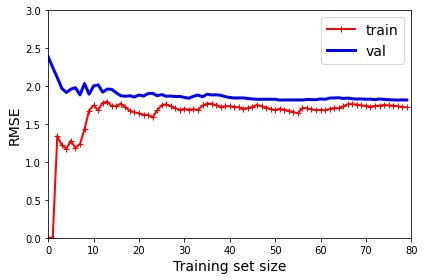

In [29]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # 책에는 없음
save_fig("underfitting_learning_curves_plot")   # 책에는 없음
plt.show()  

과소적합된 이 모델은 설명이 좀 필요함. 먼저 훈련데이터의 성능을 보면 그래프가 0에서

시작하므로 훈련세트에 하나 혹은 2개의 샘플이 있을땐 모델이 완벽하게 작동함.

하지만 훈련세트가 추가됨에 따라 잡음도 있고 비선형이기 때문에 

모델이 훈련데이터를 완벽히 학습하는 것이 불가능. 

그래서 곡선이 어느정도 평편해질 때까지 오차가 계속 상승

|

검증 데이터에 대한 모델은 모델이 적은 수의 훈련샘플로 훈련될 때는 제대로 일반화될 수 없어

검증 오차가 초기에 매우 큼. 훈련샘플이 추가됨에 따라 학습이 되고 검증 오차가 천천히 감소

하지만 선형회귀의 직선은 데이터를 잘 모델링할 수 없으므로 오차의 감소가 완만해져서 

훈련세트의 그래프와 가까워짐.

|

=> 이 학습 곡선이 과소적합된 모델의 전형적인 모습임.

- 해결방안으로는 더 복잡한 모델을 시도하거나 더 나은 특성을 선택해야함.

그림 저장: learning_curves_plot


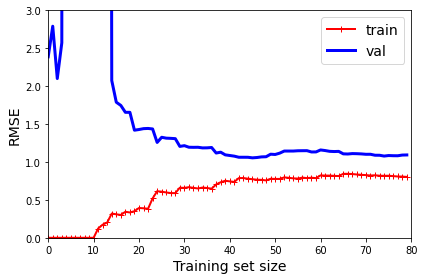

In [30]:
from sklearn.pipeline import Pipeline

# 10차 다항 회귀의 학습 곡선
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # 책에는 없음
save_fig("learning_curves_plot")  # 책에는 없음
plt.show()                        # 책에는 없음

이 학습곡선은 이전과 비슷해 보이지만 2가지 매우 중요한 차이점이 있음.

- 훈련데이터의 오차가 선형 회귀모델보다 훨씬 낮음.

- 두 곡선 사이에 공간 존재. -> 훈련데이터에서의 모델성능이 검증데이터에서보다 훨씬 낫다는 뜻.

  이는 과대적합 모델의 특징. 그러나 더 큰 훈련세트를 사용하면 2 곡선이 점점 가까워짐.

|

=> 한가지 개선방법으로는 검증오차가 훈련오차에 근접할 때까지 더 많은 훈련데이터 추가하는 것

### 편향/분산 트레이드오프

통계학과 머신러닝에서 나온 중요한 이론 하나는 모델의 일반화오차는 3가지 다른 종류의 오차의 합으로 표현할 수 있다는 사실.

- 편향

일반화 오차 중 편향은 잘못된 가정으로 인한 것. -> 과소적합되기 쉬움(편향이 큰 모델은)

(ex. 실제데이터가 2차인데 선형으로 가정하는 경우)

- 분산

훈련데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문에 나타남. -> 자유도가 높은 모델이

(ex. 고차 다항 모델) 높은 분산을 가지기 쉬워 훈련데이터에 과대적합되기 쉬움.

- 줄일 수 없는 오차

데이터 자체에 있는 잡읍 때문에 발생. 이 오차를 줄일 수 있는 유일한 방법은 데이터에서 잡음을

제거하는 것 (이상치 감지, 고장난 데이터 소스)


# 규제가 있는 선형 모델

## 릿지 회귀

릿지회귀(또는 티호노프 규제)는 규제가 추가된 선형회귀버전. 규제항 $\alpha \sum\limits_{i=1}^{n}{\theta_i}^2$ 이 비용함수에 추가됨.

이는 학습알고리즘을 데이터에 맞출 뿐만아니라 모데르이 가중치도 가능한 작게 유지시켜줌.

규제항은 훈련하는 동안에만 비용함수에 추가됨. 모델훈련이 완료시 모델성능을 규제없는 성능지표로 평가.

|

하이퍼파라미터 $\alpha$ 는 모델의 규제 정도를 조절, $\alpha = 0$ 이면 릿지회귀는 선형회귀와 같아짐.

반대로 매우 커지면 모든 가중치가 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 됨.

In [31]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

**Equation 4-8: Ridge Regression cost function**

$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \dfrac{1}{2}\sum\limits_{i=1}^{n}{\theta_i}^2
$


편향 $\theta_0$ 는 규제되지 않음.(합 기호가 i=0이 아니고 i=1에서 시작).

$\text{w}$ 를 특성의 가중치벡터($\theta_1$ 에서 $\theta_n$)라고 정의하면 규제항은 $\mathbf{\dfrac{1}{2}}(\left\|\text{w}\right\|_2)^2 $ 와 같음.

여기서 $\left\|\text{*}\right\|^2$ 가 가중치 벡터의 $\ell_2$ 노름.

경사하강법에 적용하려면 MSE 그레디언트 벡터에 $\alpha w$ 를 더하면 됨.


### CAUTION

릿지회귀는 입력특성의 스케일에 민감하기 때문에 수행전에 데이터의 스케일을 맞추는 것이 중요함.

(ex. StandardScaler를 사용) 규제가 있는 모델은 대부분 마찬가지임.

|

아래 그래프는 선형데이터에 몇가지 다른 $\alpha$ 를 사용해 릿지모델을 훈련시킨 결과.

왼쪽 그래프는 평범한 릿지모델을 사용해 선형적인 예측을 만듦.

오른쪽 그래프는 PolynomialFeatures(degree=10)을 사용해 먼저 데이터를 확장하고 

StandardScaler를 사용해 스케일 조정후 릿지모델을 적용.

그림 저장: ridge_regression_plot


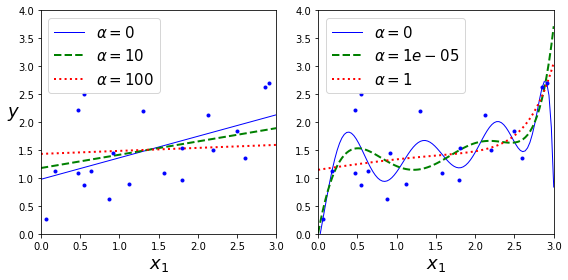

In [32]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

$\alpha$ 를 증가시킬수록 직선에 가까워지는 것을 볼 수 있음. 모델의 분산은 줄어드나 편향은 커짐. 

선형회귀와 마찬가지로 릿지회귀를 계산하기위해 정규방정식을 사용할 수도 있고 

경사하강법을 사용할 수도 있음. 장단점은 이전과 같음. 아래는 정규방정식의 해.

**Equation 4-9: Ridge Regression closed-form solution**

$
\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X} + \alpha \mathbf{A})^{-1} \mathbf{X}^T \mathbf{y}
$

아래는 사이킷런에서 정규방정식을 사용한 릿지회귀를 적용하는 예.

(안드레 루이 숄레스키가 발견한 행렬분해를 사용해 변형한 방정식을 사용함.)

In [33]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

다음은 확률적 경사하강법을 사용했을 때

In [34]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

**노트**: 향후 버전이 바뀌더라도 동일한 결과를 만들기 위해 사이킷런 0.21 버전의 기본값인 `max_iter=1000`과 `tol=1e-3`으로 지정합니다.

In [35]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

## 라쏘 회귀

**Equation 4-10: Lasso Regression cost function**

$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right|
$

그림은 릿지모델과 비슷하지만 라쏘모델이 좀 더 작은 $\alpha$ 값을 사용함.

C:\Anaconda3\envs\tf_pt\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


그림 저장: lasso_regression_plot


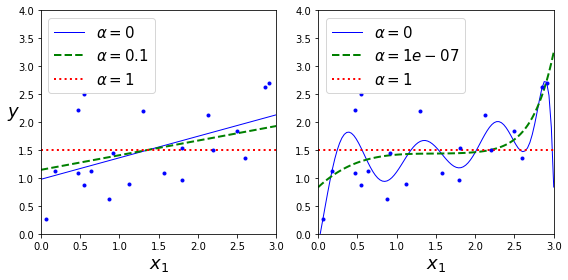

In [36]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()

라쏘 회귀의 특징은 덜 중요한 특성의 가중치를 제거하려함. (즉, 가중치가 0이 됨)

ex. 오른쪽 그래프에서 점선($\alpha = 1e-7$)은 3차방정식처럼 보임.

차수가 높은 다항특성의 가중치가 모두 0 됨. 다시 말해 라쏘회귀는 자동으로 특성선택을 하고 희소모델을 만듦.

(즉, 0이 아닌 특성의 가중치가 적음.)

[좌측상단 그래프]의 등고선은 $\ell_1$ 손실 $(|\ell_1| + |\ell_2|)$ 을 나타냄 축에 가까워지면서

선형적으로 줄어듦. 

ex. 모델 파라미터를 $\theta_1 = 2$ , $\theta_2 = 0.5$ 로 초기화하고 경사하강법을 실행하면 두 파라미터가

동일하게 감소될 것임(노란점선). 따라서 $\theta_2$ 가 먼저 0에 도달함.

($\theta_2$ 가 시작할 때 0에 더 가깝기 때문)

|

그다음 경사하강법이 $\theta_1=0$ 도달할 때까지 축을 따라내려감.

($\ell_1$ 의 그레디언트는 0에서 정의되지 않기 때문에 진동이 조금 있음. 이 지점에서 그레디언트는 

-1 또는 1임). [우측상단 그래프]의 등고선은 라쏘 손실함수를 나타냄(즉, $\theta_1$ 손실을 더한 MSE 손실함수).

|

하얀 작은 원이 경사하강법이 $\theta_1 = 0.25$ , $\theta_2 = -1$ 로 초기화된 모델 파라미터를

최적화하는 과정을 보여줌. 여기에서도 $\theta_2 = 0$ 으로 빠르게 줄어들고 그다음 축을 따라 진동하면서

전역 최적점(빨간 사각형)에 도달.

|

$\alpha$ 가 증가하면 전역최적점이 노란점선을 따라 왼쪽으로 이동. 

$\alpha$ 가 감소하면 전역최적점이 오른쪽으로 이동.

(이 예에서 규제가 없는 최적의 파라미터는 $\theta_1 = 2$ , $\theta_2 = 0.5$)

In [37]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

그림 저장: lasso_vs_ridge_plot


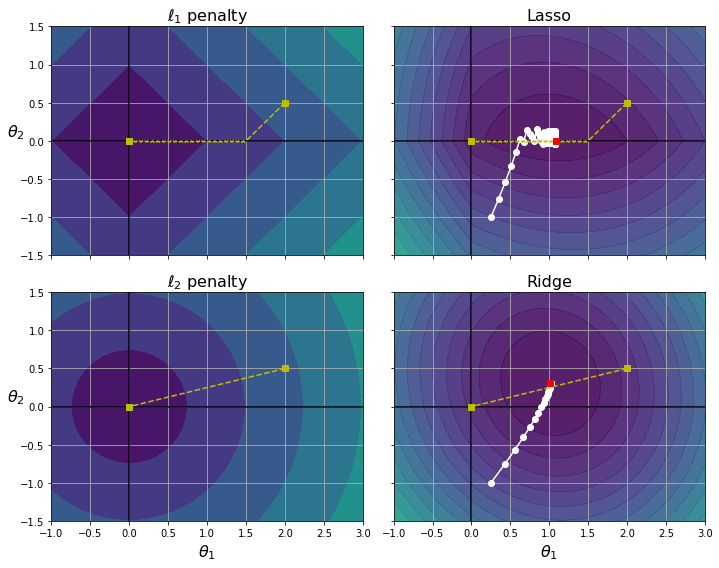

In [38]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

save_fig("lasso_vs_ridge_plot")
plt.show()

아래 2 개의 그래프도 동일하지만 $\ell_2$ 패널티를 사용.

[좌측하단 그래프]에서 $\ell_2$ 손실은 원점에서 가까울수록 줄어드는 것을 볼 수 있음.

따라서 경사하강법이 원점까지 직선 경로를 따라감. [우측하단 그래프]의 등고선은 릿지회귀의 비용함수를 나타냄.

(즉 $\ell_2$ 손실을 더한 MSE 손실함수).

|

라쏘와 다른점은 크게 2가지 :

1. 첫번째 파라미터가 전역최적점에 가까워질수록 그레디언트 작아짐. 

   따라서 경사하강법으로 자동으로 느려지고 수렴에 도움이 됨(진동 없음)

2. $\alpha$ 를 증가시킬수록 최적의 파라미터(빨간 사각형)가 원점에 더 가까워짐. 완전히 0이 되지는 않음.

#### TIP

라쏘를 사용할 시 경사하강법이 최적점 근처에서 진동하는 것을 막으려면 훈련하는 동안 

점진적으로 학습률을 감소시켜야 함. (여전히 최적점 근처에서 진동하겠지만 스텝이 갈수록 작아지므로 수렴하게 될 것.)

라쏘의 비용함수는 $\theta_i(\text{i=1,2,...,n 일때})$ 에서 미분불가능.

하지만 $\theta_i = 0$ 일 때 서브그레디언트 벡터 $\mathbf{g}$ 를 사용하면 경사하강법을 적용하는 데 문제없음.

아래식은 경사하강법을 위해 라쏘 비용 함수에 사용할 수 있는 서브그레디언트 벡터 공식.

|

**Equation 4-11: Lasso Regression subgradient vector**


$
g(\boldsymbol{\theta}, J) = \nabla_{\boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta}) + \alpha *
$

$

\begin{pmatrix}
  \operatorname{sign}(\theta_1) \\
  \operatorname{sign}(\theta_2) \\
  \vdots \\
  \operatorname{sign}(\theta_n) \\
\end{pmatrix} \quad \text{where }                                                                           \operatorname{sign}(\theta_i) =
\begin{cases}
-1 & \text{if } \theta_i < 0 \\
0 & \text{if } \theta_i = 0 \\
+1 & \text{if } \theta_i > 0
\end{cases}
$


Lasso 클래스를 사용한 간단한 사이킷런 예제 

(Lasso 대신 SGDRegressor(penalty="l1")을 사용할 수도 있음.)

In [39]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

## 엘라스틱넷



엘라스틱넷은 릿지회귀와 라쏘회귀를 절충한 모델로, 규제항은 릿지와 회귀의 규제항을 단순히 더해 사용하며,

혼합정도는 혼합비율은 r을 사용해 조절. r=0이면 엘라스틱넷은 릿지회귀와 같고 r=1이면 라쏘회귀와 같음.

|

**Equation 4-12: Elastic Net cost function**

$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + r \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right| + \dfrac{1 - r}{2} \alpha \sum\limits_{i=1}^{n}{{\theta_i}^2}
$


그럼 보통 선형회귀(즉, 규제없는 모델), 릿지, 라쏘, 엘라스틱넷은 언제 사용해야 하는가?

적어도 약간의 규제가 있는 것이 좋으므로 일반적인 선형회귀를 피해야함.

릿지가 기본이지만 특성이 몇 개뿐이라고 의심되면 라쏘나 엘라스틱넷이 좋음.

|

이 모델들은 이전에 예기한 것처럼 불필요한 가중치를 0으로 만들어줌.

특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 

보통 라쏘가 문제를 일으키므로 엘라스틱넷을 선호

아래 코드는 사이킷런의 ElasticNet을 사용함 (l1_ratio 는 혼합 비율 r)

In [40]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## 조기 종료

검증에러가 최솟값에 도달시 훈련을 중지시키는 것.

아래 그래프는 배치 경사하강법으로 훈련시킨 복잡한 모델을 보여줌.

에포크가 진행될수록 점차 학습되어 훈련세트에 대한 예측 에러(RMSE)와 검증세트에 대한 예측에러가 줄어듦.

|

그러나 잠시 후 감소하던 검즈엥러가 멈추었다가 다시 상승함.

=> 모델이 훈련세트에 과대적합되기 시작

=> 조기 종료는 검증 에러가 최소에 도달하는 즉시 훈련을 멈추는 것.

In [41]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

다음은 조기 종료를 위한 기본적인 구현코드

In [43]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 중지된 곳에서 다시 시작합니다
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

그림 저장: early_stopping_plot


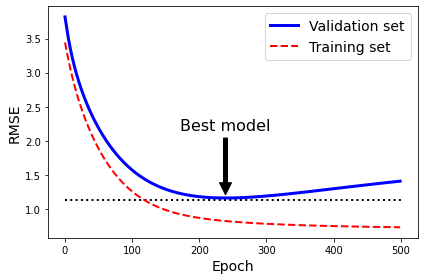

In [44]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()

#### TIP

확률적 경사하강법이나 미니배치 경사하강법에서는 곡선이 그리 매끄럽지 않아 최솟값이 도달했는지

확신이 어려움. 하나 해결책은 검증 에러가 일정시간 동안 최솟값보다 클 때(더는 성능향상이 안 된다고 확신할 때)

학습을 멈추고 검증 에러가 최소일 때로 모델 파라미터로 되돌림.

warm_start=True로 지정하면 fit() 메서드가 호출될 때 처음부터 다시 시작하지 않고 

이전 모델 파라미터에서 훈련을 이어감.

# 로지스틱 회귀

샘플이 특정 클래스에 속할 확률을 추정하는데 널리 사용.(ex. 스팸메일일 확률계산)

추정 확률이 50%가 넘으면 모델은 그 샘플이 클래스에 속한다고 예측 (즉, 레이블이 '1'인 양성클래스)

또는 클래스에 속하지 않는다고 예측 (즉, 레이블이 '0'인 음성클래스)

=> 이진 분류기

## 확률 추정

로지스틱 회귀는 어떻게 작동하는가? 선형회귀 모델과 같이 입력특성의 가중치 합을 계산

대신 선형회귀처럼 바로 결과를 출력하지 않고 결괏값의 로지스틱을 출력

**Equation 4-13: Logistic Regression model estimated probability (vectorized form)**

$
\hat{p} = h_{\boldsymbol{\theta}}(\mathbf{x}) = \sigma(\boldsymbol{\theta}^T \mathbf{x})
$


로지스틱($\sigma(*)$ 로 표현)은 0~1 사이의 값을 출력하는 시그모이드 함수(즉, S자 형태)

그림 저장: logistic_function_plot


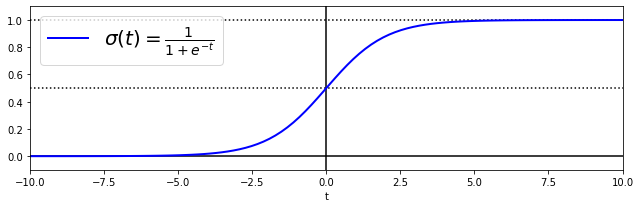

In [45]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
save_fig("logistic_function_plot")
plt.show()


**Equation : logistic_func**
$
\sigma(t) = \frac{1}{1 + \mathbf{exp}^(-t)}
$


로지스틱 회귀 모델이 샘플 x가 양성클래스에 속할 확률 $\hat{p} = h_{\boldsymbol{\theta}}(\mathbf{x})$ 를 추정하면

이에 대한 예측 $\hat{y}$ 을 쉽게 구할 수 있음.

|

**Equation 4-15: Logistic Regression model prediction**

$
\hat{y} = 
$
$\begin{cases}
  0 & \text{if } \hat{p} < 0.5, \\
  1 & \text{if } \hat{p} \geq 0.5.
\end{cases}
$

|

$t < 0$ 이면 $\sigma(t) < 0.5$ 이고, $t \geq 0$ 이면 $\sigma(t) \geq 0.5$ 이므로 로지스틱 회귀모델은 

$\theta^\mathbf{T} \mathbf{x}$ 가 양수일 때 양성클래스라 예측, 음수일 때 음성클래스라 예측

###### NOTICE_ 종종 로짓(logit)이라고 부르기도 함. $logit(\mathbf{p}) = \log(\mathbf{p} / (1 - \mathbf{p}))$ 로 정의되는 로짓함수가 로지스틱함수의 역함수라는 사실에서 따옴. 
###### 실제로 추정 확률 p의 로짓을 계산하면 t값을 얻을 수 있음.

## 훈련과 비용 함수

이제 로지스틱 회귀 모델이 어떻게 확률을 추정하는지 알았으니

이번에는 어떻게 훈련시킬까? 훈련의 목적은 양성샘플(y=1)에 대해서는 높은 확률을 추정하고 

음성샘플(y=0에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 $\theta$ 를 찾는 것.



이런 아이디어가 하나의 훈련샘플 x에 대해 나타낸 비용함수인 아래식에 드러남.

**Equation 4-16: Cost function of a single training instance**

$
c(\boldsymbol{\theta}) =
$
$\begin{cases}
  -\log(\hat{p}) & \text{if } y = 1, \\
  -\log(1 - \hat{p}) & \text{if } y = 0.
\end{cases}
$

비용함수는 t가 0에 가까워지면 $-\log(t)$ 가 매우 커지므로 타당하다 할 수 있음.

그러므로 모델이 양성 샘플을 0에 가까운 확률로 추정하면 비용이 크게 증가할 것.

또한 음성 샘플을 1에 가까운 확률로 추정해도 비용이 증가할 것.

|

반면에 t가 1에 가까우면 $-\log(t)$ 는 0에 가까워짐.

따라서 기대한 대로 음성샘플의 확률을 0에 가깝게 추정하거나

양성샘플의 확률을 1에 가깝게 추정하면 비용이 0에 가까워질 것.

**Equation 4-17: Logistic Regression cost function (log loss)**

$
J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]}
$

안타깝게도 이 비용함수의 최솟값을 계산하는 알려진 해가 없습니다. (정규방정식 같은 것 없음)

하지만 이 비용함수는 볼록함수이므로 경사하강법이 전역최솟값을 찾는 것을 보장

(학습률이 너무 크지 않고 충분히 기다릴 시간만 있다면).

|

이 비용함수의 j번째 모델 파라미터 $\theta_j$ 에 대해 편미분하면 아래식이 나옴.

**Equation 4-18: Logistic cost function partial derivatives**

$
\dfrac{\partial}{\partial \theta_j} \text{J}(\boldsymbol{\theta}) = \dfrac{1}{m}\sum\limits_{i=1}^{m}\left(\mathbf{\sigma(\boldsymbol{\theta}}^T \mathbf{x}^{(i)}) - y^{(i)}\right)\, x_j^{(i)}
$

이 식은 [식 4-5]와 매우 비슷해보임. 각 샘플에 대해 예측 오차를 계산하고 j번째 특성값을 곱해서

모든 훈련샘플에 대해 평균을 냅니다. 모든 편도함수를 포함한 그레디언트 벡터를 만들면

배치경사하강법 알고리즘을 사용할 수 있음.

|

물론 확률적 경사하강법은 한 번에 하나의 샘플을 사용하고 미니배치 경사하강법은 한 번에 하나의 미니배치를 사용.

## 결정 경계

로지스틱 회귀를 설명하기 위해 붓꽃 데이터셋을 사용해보겠습니다.

이 데이터셋은 3개의 품종에 속하는 붓꽃 150개의 꽃잎과 꽃받침의 너비와 길이를 담고 있습니다.

꽃잎의 너비를 기반으로 Iris-Versicolor를 감지하는 분류기를 만들어 봅시다.

In [46]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [47]:
X = iris["data"][:, 3:]  # 꽃잎 너비
y = (iris["target"] == 2).astype(int)  # Iris virginica이면 1 아니면 0

로지스틱 회귀 모델을 훈련

In [48]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

꽃잎의 너비가 0 ~ 3cm인 꽃에 대해 모델의 추정확률을 계산해보겠습니다.

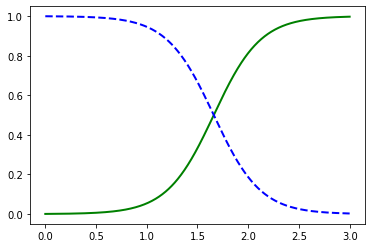

In [49]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
# 다음은 이미지를 미려하게 출력하기 위한 맷플롯립 코드가 이어짐.

그림 저장: logistic_regression_plot


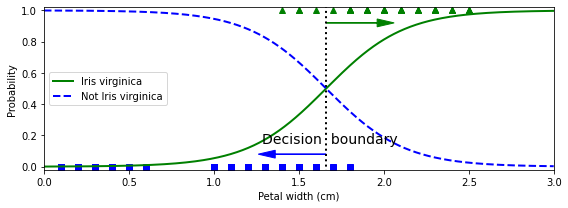

In [51]:
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary[0], 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary[0], 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=10)
plt.ylabel("Probability", fontsize=10)
plt.legend(loc="center left", fontsize=10)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

Iris-Verginica(삼각형으로 표시)의 꽃잎의 너비 = 1.4 ~ 2.5cm에 분포

다른 붓꽃의 꽃잎의 너비 = 0.1 ~ 1.8cm에 분포

꽃잎의 너비가 2cm 이상인 꽃은 분류기 Iris-Verginica라고 강하게 확신

반면 너비가 1cm 아래면 Iris-Verginica가 아니라고 강하게 확신

|

=> 이 두 극단 사이에는 분류가 확실치 않음. 하지만 어쨋든 클래스를 예측하려고하면

(predict_proba() 대신 predict()를 사용해서) 가장 가능성 높은 클래스를 반환할 것.

그렇기 때문에 양쪽의 확률이 똑같이 50%가 되는 1.6cm 근방에서 결정경계가 만들어짐.

|

=> 꽃잎 너비가 1.6cm보다 크면 Iris-Verginica로 분류하고, 그보다 작으면 예측할 것(아주 확실치 않더라도)

In [53]:
decision_boundary     # 결정경계

array([1.66066066])

In [54]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

아래 그래프는 같은 데이셋을 이번에는 꽃잎 너비와 꽃잎 길이 2개의 특성으로 보여줌.

훈련이 끝나면 로지스틱 회귀 분류기가 이 두 특성을 기반으로 하여 새로운 꽃이

Iris-Verginica 인지 확률 추정

|

점선은 모델이 50% 확률을 추정하는 지점으로, 이 모델의 결정경계임(해당 경계는 선형임).

15%부터 90%까지 나란한 직선들은 모델이 특정 확률을 출력하는 포인트를 나타냄.

모델은 맨 오른쪽 위의 직선을 넘어서 있는 꽃들을 90% 이상의 확률로 Iris-Verginica라고 판단할 것.

그림 저장: logistic_regression_contour_plot


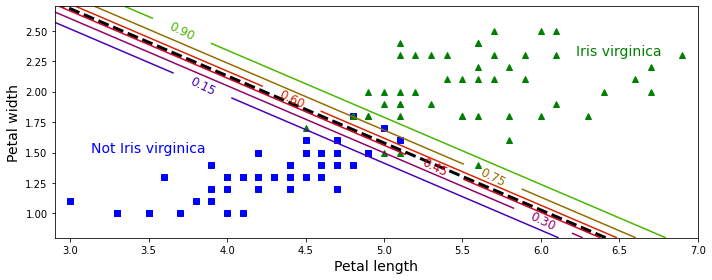

In [55]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("logistic_regression_contour_plot")
plt.show()

다른 선형 모델처럼 로지스틱 회귀모델도 $\ell_1, \ell_2$ 패널티를 사용하여 규제할 수 있음.

사이킷런은 $\ell_2$ 패널티를 기본으로 함.

## 소프트맥스 회귀

로지스틱 회귀 모델은 (3장에서 언급한 것처럼) 여러 개의 이진 분류기를 훈련시켜 연결하지 않고

직접 다중 클래스를 지원하도록 일반화될 수 있음. => 소프트맥스 회귀(= 다항 로지스틱 회귀)

|

개념은 간단. 샘플 $\boldsymbol{x}$가 주어지면 먼저 소프트맥스 회귀 모델이 각 클래스 $\boldsymbol{k}$ 에 대한 점수 $s_k(\mathbf{x})$ 를

계산하고, 그 점수에 소프트맥스 함수(또는 정규화된 지수 함수라고 함.)를 적용해 각 클래스의 확률을 추정.

$s_k(\mathbf{x})$ 를 계산하는 식은 선형회귀 예측을 위한 식과 매우 비슷해서 친숙할 것.

**Equation 4-19: Softmax score for class k**

$
s_k(\mathbf{x}) = ({\boldsymbol{\theta}^{(k)}})^T \mathbf{x}
$

각 클래스는 자신만의 파라미터 벡터 $\theta^(k)$ 가 있음. 파라미터 행렬 $\boldsymbol{\Theta}$ 에 행으로 저장됨.

|

샘플 x에 대해 각 클래스의 점수가 계산되면 소프트맥스 함수[식 4-20]를 통과시켜 클래스 $\boldsymbol{k}$ 에

속할 확률 $\hat{p}_k$ 을 추정할 수 있음. 이 함수는 각 점수에 지수함수를 적용한 후 정규화합니다.

(모든 지수 함수 결과의 합으로 나눔). (사실 정규화되지 않은 로그-오즈지만)

일반적으로 이 점수를 로짓또는 로그-오즈라고 부름.

**Equation 4-20: Softmax function**

$
\hat{p}_k = \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}
$

로지스틱 회귀 분류기와 마찬가지로 소프트맥스 회귀 분류기는 아래식[식 4-21]처럼 

추정 확률이 가장 높은 클래스를 선택함.(그냥 높은 점수를 가진 클래스)

**Equation 4-21: Softmax Regression classifier prediction**

$
\hat{y} = \underset{k}{\operatorname{argmax}} \, \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \underset{k}{\operatorname{argmax}} \, s_k(\mathbf{x}) = \underset{k}{\operatorname{argmax}} \, \left( ({\boldsymbol{\theta}^{(k)}})^T \mathbf{x} \right)
$

argmax 연산은 함수를 최대화하는 변수의 값을 반환함. 이 식에서는 추정 확률 $\sigma(s(\mathbf{x}))_k$ 가

최대인 $k$ 값을 반환함.



##### TIP

소프트맥스 회귀 분류기는 한 번에 하느이 클래스만 예측함(즉, 다중 클래스지 다중 출력은 아님)

그래서 종류가 다른 붓꽃같이 상호 배타적인 클래스에서만 사용해야함.

하나의 사진에서 여러사람의 얼굴 인식하는데는 쓸 수 없음.

이제는 훈련 방법에 대해 살펴봅시다. 모델이 타깃 클래스에 대해서는 높은 확률을

(그리고 다른 클래스에 대해서는 낮은 확률을) 추정하도록 만드는 것이 목적.

[식 4-22]의 크로스 엔트로피 비용 함수를 최소화하는 것은 타깃 클래스에 대해 

낮은 확률을 예측하는 모델을 억제함 -> 목적에 부함.

|

크로스 엔트로피는 추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지 측정하는 용도 종종 사용됨.

**Equation 4-22: Cross entropy cost function**

$
J(\boldsymbol{\Theta}) = - \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}
$

딱 2개의 클래스가 있을 때 ($K=2$) 이 비용함수는 로지스틱 회귀의 비용함수와 같음.

#### 크로스 엔트로피

크로스 엔트로피는 원래 정보이론에서 유래. 매일 날씨정보를 전달한다고 가정합시다.

8가지 정보가 있다면 $2^3 = 8$ 이므로 이 선택사항을 3비트를 사용하여 인코딩할 수 있음.

그러나 거의 대부분의 날이 맑음이라면 '맑음'을 하나의 비트(0)로 인코딩하고 다른 7개의 선택사항을

(1로 시작하는) 4비트로 표현하는 것이 효율적.

|

크로스 엔트로피는 선택사항마다 전송한 평균 비트 수를 측정.

날씨에 대한 가정이 완벽하면 크로스 엔트로피는 날씨 자체의 엔트로피와 동일할 것임.

(즉, 예측 불가능한 고유의 성질) 

|

하지만 이런 가정이 틀렸다면(즉, 비가 자주 온다면) 크로스 엔트로피는 쿨백-라이블러 발산이라

불리는 양만큼 커질 것임.



두 확률 분포 $p$ 와 $q$ 사이의 크로스 엔트로피는 아래식과 같이 정의함.

**Cross entropy between two discrete probability distributions $p$ and $q$ (page 141):**
$ H(p, q) = -\sum\limits_{x}p(x) \log q(x) $

(분포가 이산적일 때). 조금 더 자세한 내용은 동영상 참고 : https://homl.info/xentropy

**Equation 4-23: Cross entropy gradient vector for class _k_**

$
\nabla_{\boldsymbol{\theta}^{(k)}} \, J(\boldsymbol{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}
$


이제 각 클래스에 대한 그레디언트 벡터를 계산할 수 있으므로 비용함수를 최소화하기 위한

파라미터 행렬 $\boldsymbol{\Theta}$ 를 찾기 위해 경사하강법(또는 다른 알고리즘)을 사용할 수 있음.

소프트맥스 회귀를 이용해 붓꽃을 3개의 클래스로 분류해봅시다.

사이킷런의 LogisticRegression은 클래스가 둘 이상일 때 기본적으로 OvA(일대다) 전략을 사용함.

하지만 multi_class 매개변수를 "multinomial"로 바꾸면 소프트맥스 회귀를 사용할 수 있음.

소프트맥스 회귀를 사용하려면 solver 매개변수에 "lbfgs"와 같이 소프트맥스 회귀를 지원하는

알고리즘을 지정해야함. (자세한 내용은 사이킷런의 온라인 문서를 참고)

또한 기본적으로 하이퍼파라미터 C를 사용하여 조절할 수 있는 $\ell_2$ 규제가 적용됨.

In [56]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

꽃잎의 길이가 5cm, 너비가 2cm인 붓꽃을 발견했다고 가정하고 이 붓꽃의 품종이 무엇인지

모델에 질의하면 94.2%의 확률로 Iris-Virginica(클래스 2)라고 (또는 5.8% 확률로 

Iris-Versicolor라고) 출력

In [57]:
softmax_reg.predict([[5, 2]])

array([2])

In [58]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

아래 그래프는 만들어진 결정 경계를 배경색으로 구분함. 클래스 사이의 결정 경계가 모두 선형.

또한 Iris-Versicolor 클래스에 대한 확률을 곡선으로 나타냄. 

(즉, 0.450인 직선은 45% 확률 경계를 나타냄). 이 모델이 추정 확률 50% 이하인 클래스를

예측할 수도 있다는 점에 주목해야함! 

|

예로 모든 결정 경계가 만나는 지점에서 몯느 클래스가 동일하게 33%의 추정확률을 가짐.

그림 저장: softmax_regression_contour_plot


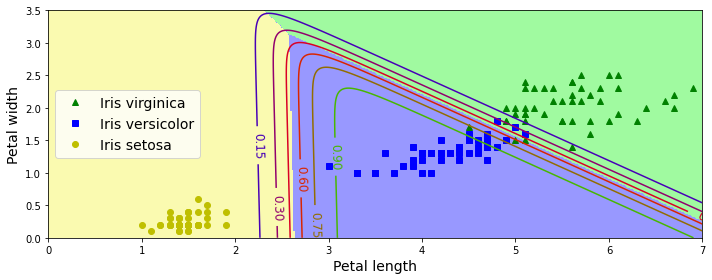

In [59]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()